<a href="https://colab.research.google.com/github/Aivan-17/Catalogo_backend/blob/main/Laboratorio3_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 2:** Procesamiento de datos

A. Lectura y análisis exploratorio de datos

  1. Cargar la base de datos de nombre [ejemplo_data.csv](https://drive.google.com/file/d/1TWSkXB76-xMVPDjL3Ow5A_31Eqcfy8ES/view?usp=sharing) y crear una función para triplicar el número de instancias. 


In [4]:
import pandas as pd

df = pd.read_csv("ejemplo_data.csv")
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


 2. Identificar los tipos de varibles que hay disponibles en la base de datos (usando `df.dtypes` o `df.info()`). 

In [8]:
print(df.info())
print("___________________________________________")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 512.0+ bytes
None
___________________________________________
ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo         object
dtype: object


3. Crear una función para identificar las variables que tengan valores monetarios. Una vez identificadas, convertirlas a valores float64 usando una segunda función, similar a la función `convertir_monto`.

In [9]:
import pandas as pd

# Función para identificar columnas con valores monetarios
def identificar_montos(df):
    # Inicializamos una lista vacía para almacenar los nombres de las columnas con valores monetarios
    columnas_montos = []
    # Recorremos cada nombre de columna en el DataFrame df
    for nombre_columna in df.columns:
        # Si la palabra "monto" aparece en el nombre de la columna o algún valor en la columna contiene el símbolo "$"
        if "monto" in nombre_columna.lower() or df[nombre_columna].astype(str).str.contains("\$").any():
            # Añadimos el nombre de la columna a la lista de columnas con valores monetarios
            columnas_montos.append(nombre_columna)
    # Devolvemos la lista de nombres de columnas con valores monetarios
    return columnas_montos

# Función para convertir los valores monetarios a valores float64
def convertir_montos(df, columnas_montos):
    # Recorremos cada nombre de columna con valores monetarios
    for nombre_columna in columnas_montos:
        # Usamos la función apply() de Pandas para aplicar una función lambda a cada celda de la columna
        # La función lambda elimina el símbolo "$" de la cadena de texto que representa el valor monetario y lo convierte a float64
        df[nombre_columna] = df[nombre_columna].apply(lambda x: float(str(x).replace("$", "").replace(",", "")))
    # Devolvemos el DataFrame actualizado con los valores monetarios convertidos a float64
    return df


In [12]:
columnas_montos = identificar_montos(df)
df = convertir_montos(df, columnas_montos)
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,162500.0,30.00%,500,1-10-2015,1
1,552278,Manantial sa,920000.0,1012000.0,10.00%,700,6-23-2014,0
2,23477,ACME,50000.0,62500.0,25.00%,125,3-12-2016,1
3,24900,Andes sur,350000.0,490000.0,4.00%,75,10-28-2015,1
4,651029,San Pablo,15000.0,12750.0,-15.00%,No,2-15-2014,0
5,651029,San Pablo,-15000.0,12750.0,-15.00%,No,2-15-2014,n


4. Usar la función scatter, barh y bar para graficar dos de las variables númericas del dataframe. Estas se encuentran provistas en cada columna en el dataframe.  

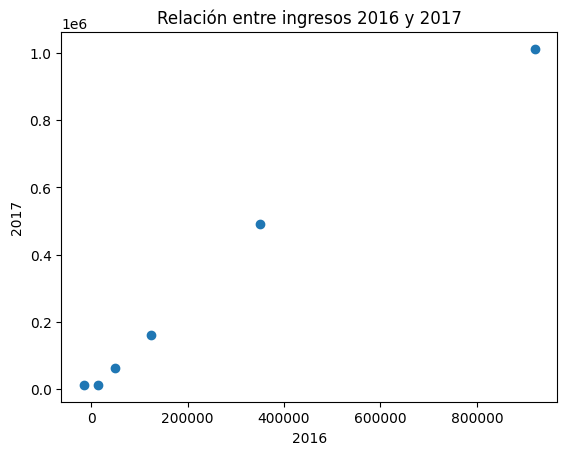

In [18]:
import matplotlib.pyplot as plt

# Graficar variables '2016' y '2017' como scatter plot
plt.scatter(df['2016'], df['2017'])
plt.xlabel('2016')
plt.ylabel('2017')
plt.title('Relación entre ingresos 2016 y 2017')
plt.show()

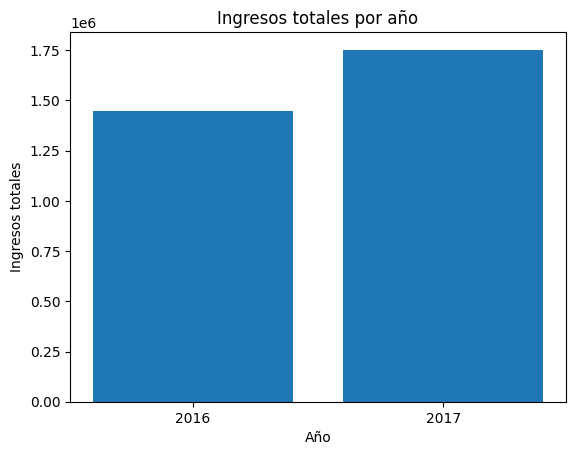

In [19]:
# Graficar variables '2016' y '2017' como gráfico de barras
plt.bar([0, 1], [df['2016'].sum(), df['2017'].sum()])
plt.xticks([0, 1], ['2016', '2017'])
plt.xlabel('Año')
plt.ylabel('Ingresos totales')
plt.title('Ingresos totales por año')
plt.show()

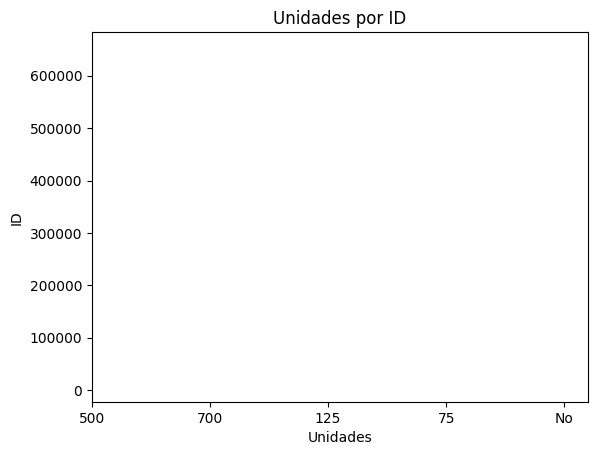

In [20]:
# Graficar variables 'ID' y 'Unidades' como gráfico de barras horizontales
plt.barh(df['ID'], df['Unidades'])
plt.xlabel('Unidades')
plt.ylabel('ID')
plt.title('Unidades por ID')
plt.show()

B. Estadísticas descriptivas

  1. Crear un diccionario con 20 datos que contenga al menos dos atributos continuos y una variable categórica (por ejemplo: nombre, nota, edad).

Este diccionario contiene 23 datos de personas, cada uno con los siguientes atributos:
*   Nombre: el nombre de la persona (variable categórica).
*   Edad: la edad de la persona (atributo continuo).
*   Altura: la altura de la persona en metros (atributo continuo).
*   Genero: el género de la persona (variable categórica).
*   Estado Civil: el estado civil de la persona (variable categórica).
*   Nacionalidad: la nacionalidad de la persona (variable categórica).



In [21]:
datos = {
    "Nombre": ["Juan", "Maria", "Luis", "Ana", "Pedro", "Sofia", "Carlos", "Laura", "Diego", "Elena", "Miguel", "Lucia", "Pablo", "Camila", "Julia", "Andres", "Valentina", "Santiago", "Valeria", "Gabriel", "Isabella", "Jorge", "Renata"],
    "Edad": [25, 34, 27, 19, 42, 29, 38, 28, 31, 23, 27, 35, 24, 26, 22, 30, 20, 33, 28, 36, 21, 26, 39],
    "Altura": [1.75, 1.65, 1.80, 1.62, 1.82, 1.71, 1.70, 1.75, 1.78, 1.60, 1.81, 1.63, 1.76, 1.68, 1.72, 1.83, 1.76, 1.79, 1.64, 1.81, 1.70, 1.72, 1.77],
    "Genero": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "Estado Civil": ["Soltero", "Casado", "Soltero", "Soltero", "Casado", "Casado", "Casado", "Soltero", "Casado", "Soltero", "Casado", "Casado", "Soltero", "Soltero", "Soltero", "Casado", "Soltero", "Casado", "Casado", "Soltero", "Casado", "Casado", "Soltero"],
    "Nacionalidad": ["Colombiano", "Argentino", "Mexicano", "Peruano", "Brasileño", "Venezolano", "Chileno", "Ecuatoriano", "Boliviano", "Paraguayo", "Uruguayo", "Costarricense", "Panameño", "Guatemalteco", "Hondureño", "Salvadoreño", "Nicaragüense", "Dominicano", "Cubano", "Puertorriqueño", "Español", "Portugués", "Italiano"]
}

2. Transformar dicho diccionario a un data frame de pandas.

In [23]:
import pandas as pd

data = {
    'Nombre': ['Juan', 'Maria', 'Pedro', 'Ana', 'Luis', 'Sofia', 'David', 'Marta', 'Rosa', 'Diego', 'Sara', 'Pablo', 'Javier', 'Lucia', 'Carla', 'Andres', 'Hector', 'Paula', 'Eva', 'Julia'],
    'Edad': [23, 19, 31, 28, 22, 25, 29, 27, 24, 26, 30, 18, 21, 33, 35, 20, 32, 34, 19, 22],
    'Nota': [4.5, 3.2, 4.1, 3.8, 4.3, 3.7, 4.9, 4.0, 4.6, 3.9, 4.2, 3.5, 4.8, 3.6, 4.0, 3.9, 3.7, 4.5, 3.8, 4.1],
    'Genero': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F'],
    'Ciudad': ['Bogotá', 'Medellín', 'Cali', 'Bogotá', 'Medellín', 'Cali', 'Bogotá', 'Medellín', 'Cali', 'Bogotá', 'Medellín', 'Cali', 'Bogotá', 'Medellín', 'Cali', 'Bogotá', 'Medellín', 'Cali', 'Bogotá', 'Medellín']
}

df = pd.DataFrame(data)
df

,Nombre,Edad,Nota,Genero,Ciudad
0,Juan,23,4.5,M,Bogotá
1,Maria,19,3.2,F,Medellín
2,Pedro,31,4.1,M,Cali
3,Ana,28,3.8,F,Bogotá
4,Luis,22,4.3,M,Medellín
5,Sofia,25,3.7,F,Cali
6,David,29,4.9,M,Bogotá
7,Marta,27,4.0,F,Medellín
8,Rosa,24,4.6,F,Cali
9,Diego,26,3.9,M,Bogotá


3. Obtener estadísticas descriptivas de tendencia central: media, mediana, moda. 


In [25]:
# Obtener resumen estadístico con el método describe()
print(df.describe())
print("___________________________________________")
# Obtener la media, mediana y moda de la columna 'Edad'
print('Media de Edad:', df['Edad'].mean())
print("___________________________________________")
print('Mediana de Edad:', df['Edad'].median())
print("___________________________________________")
print('Moda de Edad:', df['Edad'].mode())
print("___________________________________________")
# Obtener la media, mediana y moda de la columna 'Nota'
print('Media de Nota:', df['Nota'].mean())
print("___________________________________________")
print('Mediana de Nota:', df['Nota'].median())
print("___________________________________________")
print('Moda de Nota:', df['Nota'].mode())
print("___________________________________________")


           Edad       Nota
count  20.00000  20.000000
mean   25.90000   4.055000
std     5.39883   0.443046
min    18.00000   3.200000
25%    21.75000   3.775000
50%    25.50000   4.000000
75%    30.25000   4.350000
max    35.00000   4.900000
___________________________________________
Media de Edad: 25.9
___________________________________________
Mediana de Edad: 25.5
___________________________________________
Moda de Edad: 0    19
1    22
Name: Edad, dtype: int64
___________________________________________
Media de Nota: 4.055
___________________________________________
Mediana de Nota: 4.0
___________________________________________
Moda de Nota: 0    3.7
1    3.8
2    3.9
3    4.0
4    4.1
5    4.5
Name: Nota, dtype: float64
___________________________________________


 4. Obtener estadísticas descriptivas de dispersión: desviación estandar, varianza, covarianza, rango, quantiles. 

In [27]:
# Desviación estándar
print("Desviación estándar de Edad: ", df['Edad'].std())
print("Desviación estándar de Nota: ", df['Nota'].std())
print("___________________________________________")
# Varianza
print("Varianza de Edad: ", df['Edad'].var())
print("Varianza de Nota: ", df['Nota'].var())
print("___________________________________________")
# Covarianza
print("Covarianza entre Edad y Nota: ", df['Edad'].cov(df['Nota']))
print("___________________________________________")
# Rango
print("Rango de Edad: ", df['Edad'].max() - df['Edad'].min())
print("Rango de Nota: ", df['Nota'].max() - df['Nota'].min())
print("___________________________________________")
# Percentiles
print("Percentil 25 de Edad: ", df['Edad'].quantile(0.25))
print("Percentil 50 de Edad: ", df['Edad'].quantile(0.50))
print("Percentil 75 de Edad: ", df['Edad'].quantile(0.75))
print("Percentil 25 de Nota: ", df['Nota'].quantile(0.25))
print("Percentil 50 de Nota: ", df['Nota'].quantile(0.50))
print("Percentil 75 de Nota: ", df['Nota'].quantile(0.75))


Desviación estándar de Edad:  5.398830282667963
Desviación estándar de Nota:  0.44304567900410735
___________________________________________
Varianza de Edad:  29.147368421052636
Varianza de Nota:  0.1962894736842105
___________________________________________
Covarianza entre Edad y Nota:  0.35315789473684245
___________________________________________
Rango de Edad:  17
Rango de Nota:  1.7000000000000002
___________________________________________
Percentil 25 de Edad:  21.75
Percentil 50 de Edad:  25.5
Percentil 75 de Edad:  30.25
Percentil 25 de Nota:  3.775
Percentil 50 de Nota:  4.0
Percentil 75 de Nota:  4.35
